In [1]:

import numpy as np
import random
import matplotlib.pyplot as plt
import math
import time
import scipy  
import pandas as pd
from scipy import stats
import sys

import os
import pickle

import seaborn as sns

try:
    import winsound
except ImportError:
    def playsound(frequency,duration):
        print("No sound available because Linux")
    
else:
    def playsound(frequency,duration):
        winsound.Beep(frequency,duration)



np.set_printoptions(suppress=True, precision=5) # disable scientific notation

# TO DO: # make plots of cp and cu depending on I_value

In [2]:
playsound(444,444)

No sound available because Linux


In [3]:
distance_to_points = 0.127  # determins how many new points are included per iteration
                            # higher value results in fewer iterations but more points will be computed
                            # if the value is too low, some points may be missed. Not good
                            # if the value is too high, too many points will be computed
        
        
        
Grid_size = 74               # the grid of Grid_size ^2 points is considered

In [4]:
# kI  does not! affect the ratio I_p/I_u!
kI = 0.00001

In [8]:
# Polish population
Pol_Pop = pd.read_csv("beta_30_Pl_AA.csv")
PolPopulation = np.array(Pol_Pop["SourcePopulation"])
PolPopulation = np.sort(PolPopulation)

In [9]:
N_iterations = 39 
N_cities = len(PolPopulation)
#N_cities = 4 #number of city sizes in synthetic data

In [10]:
    # initialize cities array. The distribution is given manually
if False:
    def initialize_cities_array():
        
        # zeroth column is city size y, first is beta(y), second is pi_p(y), third  pi_U(y)
        zeta      = np.zeros((N_cities, 4))
        zeta[0,0] = 1000
        zeta[1,0] = 25369
        zeta[2,0] = 110521
        zeta[3,0] = 787445
        
        zeta[0,1] = 0.09
        zeta[1,1] = 0.05
        zeta[2,1] = 0.85
        zeta[3,1] = 0.01
        
        zeta[:,2] = 0.99 #placeholder
        zeta[:,3] = 0.99  #placeholder
    
    
        return zeta

IndentationError: expected an indented block (3576163090.py, line 3)

In [55]:
#Different choices for Q_value depending on 5 choices of probability
#adapted from "threshold_through_pInfected", the estimates are not precise
Pi_choice = np.array([1/10, 1/3, 1/2, 2/3, 9/10])
beta = PolPopulation
a = 1.95
b = -0.11

pI_ref_log_size = 5. #log10 size of the cities taken as a reference
Upper_R_pI_strU = 20 #upper-value in the different values of R0 tested
Nr = 1000 #grid size in the different values of R0 tested

r_0test= np.linspace(1.01, Upper_R_pI_strU, Nr)
Lref = (beta>10**(pI_ref_log_size-0.1))&(beta<10**(pI_ref_log_size+0.1))
#on an interval to capture at least one city

pi_AU = np.ones(Nr)
pi_BU= np.ones(Nr)
pi_ref_U = np.zeros(Nr)

RU = 1/N_cities*(np.sum(beta**(a+b)) + np.sqrt(np.sum(beta**(2*a-1))* np.sum(beta**(1+2*b))))
KV0 = 1/RU
bKA_U0 = KV0 * beta**(1+b)*np.sum(beta**(a-1))/N_cities
bKB_U0 = KV0 * beta**(a)*np.sum(beta**(b))/N_cities

bnuA_U = beta**(a-1)/np.sum(beta**(a-1))
bnuB_U = beta**(b)/np.sum(beta**(b))

Q_values = np.zeros(5)
RU_ref = np.zeros(5)
Pi_effective = np.zeros(5)

for i in np.arange(Nr):
    err = 1
    n_it = 0
    pi = 1- np.exp(- r_0test[i] *(bKA_U0 + bKB_U0) )
    while (err > 5E-5) * (n_it < 500):
        pi_AU[i]= np.sum(bnuA_U*pi)
        pi_BU[i]= np.sum(bnuB_U*pi)
        pi2 = 1-np.exp(- r_0test[i] *( bKA_U0 *pi_AU[i] +bKB_U0* pi_BU[i]))
        err = np.max(np.abs(1-pi/pi2))
        n_it = n_it +1
        pi = pi2
    pi_ref_U[i] = np.sum(pi[Lref])/np.sum(Lref)

startTime = time.time()
for j in np.arange(5):
    RU_ref[j] = r_0test[np.sum(pi_ref_U<Pi_choice[j])-1]
    Pi_effective[j] = pi_ref_U[np.sum(pi_ref_U<Pi_choice[j])-1]
    err = 1
    n_it = 0
    pi = 1- np.exp(- RU_ref[j] *(bKA_U0 + bKB_U0) )
    while (err > 5E-5) * (n_it < 500):
        pi_AU[i]= np.sum(bnuA_U*pi)
        pi_BU[i]= np.sum(bnuB_U*pi)
        pi2 = 1-np.exp(- RU_ref[j] *( bKA_U0 *RU_ref[j] +bKB_U0* RU_ref[j]))
        err = np.max(np.abs(1-pi/pi2))
        n_it = n_it +1
        pi = pi2
    Q_values[j] = int(np.sum(pi * beta)/N_cities)
print("time for one evaluation of Q: "+str((time.time() - startTime)/5) )
print(Q_values) #values of Q to sample from 

print(Pi_effective) #corresponding value of the probablity for a city of size 10^5 to be infected

time for one evaluation of Q: 0.0001049041748046875
[ 90303. 108752. 111281. 111965. 112073.]
[0.0993  0.33124 0.49819 0.66593 0.8998 ]


In [28]:
#Q_value = 47438
Q_value = Q_values[0]

In [29]:
# for Poland all city sizes are unique
if True:   
    def initialize_cities_array():
        
        # zeroth column is city size y, first is beta(y), second is pi_p(y), third  pi_U(y)
        zeta      = np.zeros((N_cities, 4))
        zeta[:,0] = PolPopulation
     
        
        zeta[:,1] = 1/N_cities
        
        zeta[:,2] = 0.99 #placeholder
        zeta[:,3] = 0.99  #placeholder
    
    
        return zeta

In [30]:
def Compute_piP(a,b,cp): 
    # compute pi_P given a,b, and cp =  p_v 
    xi        = initialize_cities_array()
    
    for i in range(N_iterations):
        Integral1 = 0
        Integral2 = 0
        Integral  = 0
        for j in range(np.shape(xi)[0]):
            Integral1 = Integral1 +  (xi[j,0]) ** (b+1) * xi [j, 2] * xi[j,1]   # y ^{b+1} * \beta (dy) * \Pi _p (y) 
            Integral2 = Integral2 +  (xi[j,0]) ** (a)   * xi [j, 2] * xi[j,1]

        for j in range(np.shape(xi)[0]):
            x = xi[j,0]
            Exponent = kI * cp * x ** a * Integral1 +  kI * cp * x ** (b+1) * Integral2
            #print(Exponent)
            #print(str(c) + ",  " + str(x)+ ",  " + str(Integral1)+ ",  " + str(Integral2))
            xi [j, 2] = 1 - math.exp( - Exponent)
            
    return xi

In [31]:
def Compute_piU(a,b,cu):
    # compute pi_U given a,b, and cu =  L_v 
    xi        = initialize_cities_array()
    
    for i in range(N_iterations):
        Integral1 = 0
        Integral2 = 0
        Integral  = 0
        for j in range(np.shape(xi)[0]):
            Integral1 = Integral1 +  (xi[j,0]) ** (b) * xi [j, 3] * xi[j,1]   # y ^{b} * \beta (dy) * \Pi _u (y) 
            Integral2 = Integral2 +  (xi[j,0]) ** (a-1)   * xi [j, 3] * xi[j,1]

        for j in range(np.shape(xi)[0]):
            x = xi[j,0]
            Exponent = kI * cu * x ** a * Integral1 + kI * cu * x ** (b+1) * Integral2
            #print(Exponent)
            #print(str(c) + ",  " + str(x)+ ",  " + str(Integral1)+ ",  " + str(Integral2))
            xi [j, 3] = 1 - math.exp( - Exponent)
            
    return xi 

In [32]:
# compute Ip given a,b, and cp =  p_v 

def Ip_function(a,b, cp):
    xi        = Compute_piP(a,b,cp)

            
    Ip_value = 0
    for j in range(np.shape(xi)[0]):
        Ip_value = Ip_value + xi[j,0]* xi[j,2] * xi[j,1] 
    
    Ip_value = cp * Ip_value
    
    return Ip_value
    
    

    

In [33]:
# compute Iu given a,b,   cu =   L_v

def Iu_function(a,b, cu):
    
    xi = Compute_piU(a,b,cu)
       
    Iu_value = 0
    for j in range(np.shape(xi)[0]):
        Iu_value = Iu_value +  xi[j,3] * xi[j,1] 
    
    Iu_value = cu * Iu_value
    
    return Iu_value

In [34]:
 # compute Q_p given a,b, and cp =  p_v 

def Qp_function(a,b, cp):
    
    xi        = Compute_piP(a,b,cp)
   
    Qp_value = 0
    for j in range(np.shape(xi)[0]):
        Qp_value = Qp_value + xi[j,0]* xi[j,2] * xi[j,1]  # y * pi _p (y) * beta(y)
    
    return Qp_value
    

In [35]:
# compute Q_u given a,b, and cu =  L_v 

def Qu_function(a,b, cu):
    
    xi        = Compute_piU(a,b,cu)
   
    Qu_value = 0
    for j in range(np.shape(xi)[0]):
        Qu_value = Qu_value + xi[j,0]* xi[j,3] * xi[j,1]  # y * pi _u (y) * beta(y)
    
    return Qu_value

In [56]:
cu = Compute_cu(a,b,Q_value, Verbose = True)
startTime = time.time()
Qu_function(a,b, cu)
print("time for one evaluation of Q: "+str((time.time() - startTime)) )

cu = 0.5130144690887082
This should be 90303.0: 112073.91788856301
cu = 0.12240188287137027
This should be 90303.0: 112073.91788856301
cu = 0.038449321230990846
This should be 90303.0: 112073.91788856301
cu = 0.020460710866332058
This should be 90303.0: 112073.91788856301
cu = 0.008552169570039373
This should be 90303.0: 112073.91788856301
cu = 0.0015166631992457396
This should be 90303.0: 112073.88812222565
cu = 0.000515148399605481
This should be 90303.0: 112034.00498089529
cu = 0.00022360938967651766
This should be 90303.0: 110937.08747326591
cu = 6.06816278056035e-05
This should be 90303.0: 90302.95310201333
time for one evaluation of Q: 0.020877361297607422


In [36]:
def Compute_cp(a,b,Q_value, Verbose = True):  # computes cp so that Qp_function(a,b,cp) = Q_value
    
    if Q_value > maxQ_value() - 0.1:
        raise ValueError("Q_value is too high!")
        
    cp = 1.9619 * 0.000001 * math.exp(0.03*np.random.normal())  #first guess
    This_should_get_to_Q_value = 0.8
    delta_c = cp * 0.04 * math.exp(0.011*np.random.normal())
    
    iteration_number = 0
    
    while abs(This_should_get_to_Q_value  - Q_value) > 0.1:
        iteration_number = iteration_number + 1
        if This_should_get_to_Q_value  - Q_value > 0.1:
            cp = cp - delta_c
        elif This_should_get_to_Q_value  - Q_value < -0.1:
            cp = cp + delta_c 
            
        if (This_should_get_to_Q_value - 1)/ (Q_value + 11) > 2.2:
            cp = cp * 0.94
            delta_c = cp * 0.04 * math.exp(0.05*np.random.normal())
        
        if (This_should_get_to_Q_value + 11)/ (Q_value ) <  0.42:
            cp = cp * 1.07
            delta_c = cp * 0.04 * math.exp(0.05*np.random.normal())
    
        delta_c = delta_c * 0.95
    
        This_should_get_to_Q_value = Qp_function(a, b, cp)
        if Verbose == True:
            if  iteration_number %137 == 4:
                print("cp = " + str(cp))
                print("This should be " + str(Q_value) + ": " + str(This_should_get_to_Q_value))
    
        if iteration_number % 200 == 198:
            delta_c = cp * 0.04 * math.exp(0.07*np.random.normal())
    if Verbose == True:
        print("cp = " + str(cp))
        print("This should be " +str(Q_value)+  ": " + str(This_should_get_to_Q_value))
        
    return cp

In [37]:
def Compute_cu(a,b,Q_value, Verbose = True):  # computes cu so that Qu_function(a,b,cu) = Q_value
    
    if Q_value > maxQ_value() - 0.1:
        raise ValueError("Q_value is too high!")
    
    cu = 0.52057344248  * math.exp(0.01*np.random.normal())  #first guess
    This_should_get_to_Q_value = 0.8
    delta_c = cu * 0.04 * math.exp(0.011*np.random.normal())
    
    iteration_number = 0
    
    while abs(This_should_get_to_Q_value  - Q_value) > 0.1:
        iteration_number = iteration_number + 1
        if This_should_get_to_Q_value  - Q_value > 0.1:
            cu = cu - delta_c
        elif This_should_get_to_Q_value  - Q_value < -0.1:
            cu = cu + delta_c 
            
        if (This_should_get_to_Q_value - 1)/ (Q_value + 11) > 2.2:
            cu = cu * 0.94
            delta_c = cu * 0.04 * math.exp(0.05*np.random.normal())
        
        if (This_should_get_to_Q_value + 11)/ (Q_value ) <  0.42:
            cu = cu * 1.07
            delta_c = cu * 0.04 * math.exp(0.05*np.random.normal())
    
        delta_c = delta_c * 0.95
    
        This_should_get_to_Q_value = Qu_function(a, b, cu)
        if Verbose == True:
            if  iteration_number %137 == 4:
                print("cu = " + str(cu))
                print("This should be " + str(Q_value) + ": " + str(This_should_get_to_Q_value))
    
        if iteration_number % 200 == 198:
            delta_c = cu * 0.04 * math.exp(0.07*np.random.normal())
    if Verbose == True:
        print("cu = " + str(cu))
        print("This should be " +str(Q_value)+  ": " + str(This_should_get_to_Q_value))
        
    return cu

In [38]:
def Compute_piU_and_piP(a,b, Q_value): 
    #for a given a,b, Q_value compute cp, cu, so that Qp = Qu = Q_value. Returns eta, 
    # the array consisting of 4 columns: zeroth column is city size y, first is beta(y), second is pi_p(y), third  pi_u(y)
    
    cp = Compute_cp(a,b,Q_value, Verbose = False)
    cu = Compute_cu(a,b,Q_value, Verbose = False)
    
    
    eta = initialize_cities_array()
    
    # recompute  pi_p(y) with the correct cp
    for i in range(N_iterations):
        Integral1 = 0
        Integral2 = 0
        Integral  = 0
        for j in range(np.shape(eta)[0]):
            Integral1 = Integral1 +  (eta[j,0]) ** (b+1) * eta [j, 2] * eta[j,1]   # y ^{b+1} * \beta (dy) * \Pi _p (y) 
            Integral2 = Integral2 +  (eta[j,0]) ** (a)   * eta [j, 2] * eta[j,1]

        for j in range(np.shape(eta)[0]):
            x = eta[j,0]
            Exponent = kI * cp * x ** a * Integral1 +  kI * cp * x ** (b+1) * Integral2
            #print(Exponent)
            #print(str(c) + ",  " + str(x)+ ",  " + str(Integral1)+ ",  " + str(Integral2))
            eta [j, 2] = 1 - math.exp( - Exponent)
    
    # recompute  pi_u(y) with the correct cp
    for i in range(N_iterations):
        Integral1 = 0
        Integral2 = 0
        Integral  = 0
        for j in range(np.shape(eta)[0]):
            Integral1 = Integral1 +  (eta[j,0]) ** (b) * eta [j, 3] * eta[j,1]   # y ^{b} * \beta (dy) * \Pi _u (y) 
            Integral2 = Integral2 +  (eta[j,0]) ** (a-1)   * eta [j, 3] * eta[j,1]

        for j in range(np.shape(eta)[0]):
            x = eta[j,0]
            Exponent = kI * cu * x ** a * Integral1 +  kI * cu * x ** (b+1) * Integral2
            #print(Exponent)
            #print(str(c) + ",  " + str(x)+ ",  " + str(Integral1)+ ",  " + str(Integral2))
            eta [j, 3] = 1 - math.exp( - Exponent)
            
    
    return [eta, cp, cu]

In [39]:
def Compute_Is(a,b,Q_value): #computes values I_p and I_q given a,b, and Q_value
    
    # get the correct cities array with correct probabilities
    eta, cp, cu = Compute_piU_and_piP(a,b, Q_value)
    
    
    Ip_value = 0
    for j in range(np.shape(eta)[0]):
        Ip_value = Ip_value + eta[j,0]* eta[j,2] * eta[j,1] 
    
    Ip_value = cp * Ip_value

    Iu_value = 0
    for j in range(np.shape(eta)[0]):
        Iu_value = Iu_value +  eta[j,3] * eta[j,1] 
    
    Iu_value = cu * Iu_value
 
     
    return [Ip_value, Iu_value]

In [40]:
def maxQ_value(): #maximal possilbe Q _value, corresponds to pi = 1
    xi  = initialize_cities_array()
    
    maxQ_value = 0
    for j in range(np.shape(xi)[0]):
        maxQ_value = maxQ_value + xi[j,0] * xi[j,1] # y * beta(y)
        
    return maxQ_value
        

In [49]:
if Q_value > maxQ_value() - 0.1:
    raise ValueError("Q_value is too high!")

In [50]:
def getPointsCloseToBoundary(df, DF_boundary, distance_to_points ):
    Points_close_to_the_boundary = []

    for i in range(df.shape[0]):   # add points close to the old boundary
        ai = df["a"][i]
        bi = df["b"][i]
        Distance = 1
        for j in range(DF_boundary.shape[0]):
            aj = DF_boundary["a"][j]
            bj = DF_boundary["b"][j]
            Distance = ( (ai - aj) **2 + (bi - bj) **2  )**(0.5)
            if Distance < distance_to_points:
                Points_close_to_the_boundary.append(i)
                break

    Returndf = df.iloc[Points_close_to_the_boundary] 
    Returndf = Returndf.reset_index(drop=True) # reset indices
    
    return Returndf

def getBoundary(df):

    Indices_of_boundary_points = []

    for i in range(df.shape[0]):
        ai = df["a"][i]
        bi = df["b"][i]

        for j in range(i+1): 
            aj = df["a"][j]
            bj = df["b"][j]
            GraphDistance = (abs(ai-aj) + abs(bi-bj))/ Delta
            if GraphDistance > 0.5 and GraphDistance < 1.5:
                #print("pair")
                if abs(Signs[i]- Signs[j]) > 0.5:
                    Indices_of_boundary_points.extend([i,j])
                    
    Indices_of_boundary_points =  list(set(Indices_of_boundary_points))
    DF_boundary = df.iloc[Indices_of_boundary_points]
    Signs_boundary = Signs[Indices_of_boundary_points]
    DF_boundary = DF_boundary.reset_index(drop=True)
                    
    return DF_boundary


Iteration number 1 has began...


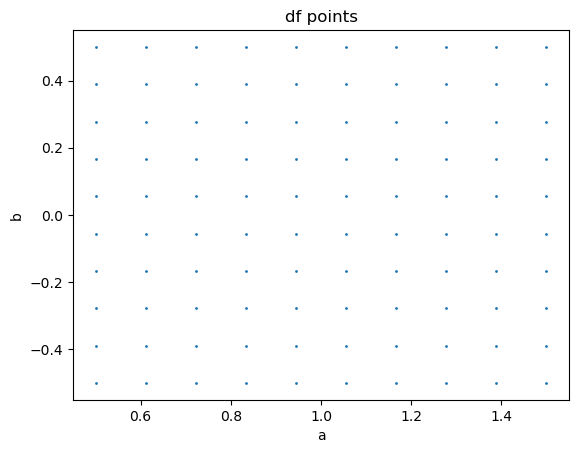

ETA for LogIpOverIu computation in this iteration = 1280.52712392807 seconds
ETA for LogIpOverIu computation in this iteration = 896.6948766027178 seconds


KeyboardInterrupt: 

In [51]:
iteration_number = 0

Boundary_is_invariant = False

while iteration_number < 81 and not Boundary_is_invariant:
    
    iteration_number = iteration_number +1
    print( "Iteration number " + str(iteration_number) + " has began...")
    aas = np.linspace(start=-0.85, stop=2.87, num=Grid_size) 
    bbs = np.linspace(start=-1.75, stop= 1.67, num=Grid_size)
    if iteration_number == 1: 
        aas = np.linspace(start=0.5, stop=1.5, num=10) 
        bbs = np.linspace(start=0.5 - 1, stop=1.5 - 1, num=10)
    Delta = (np.max(aas) - np.min(aas))/(np.shape(aas)[0] - 1)
    
    # get cartesian product of aas and bbs
    df = pd.MultiIndex.from_product([aas, bbs], names = ["a", "b"])
    df = pd.DataFrame(index = df).reset_index()
    zeros = np.zeros(( df.shape[0],1))
    df["LogIpOverIu"] = zeros  
    df = df.sample(frac=1).reset_index(drop=True)  #shuffle rows
    
    if iteration_number == 2:
        df = getPointsCloseToBoundary(df, DF_boundary, 1.2*distance_to_points)
    if iteration_number > 2.2:
        df = getPointsCloseToBoundary(df, DF_boundary, distance_to_points)
        


        
    
    plt.scatter(df["a"], df["b"], s=1)
    plt.xlabel("a")
    plt.ylabel("b")
    plt.title('df points')
    plt.show()
    
    
    
    startTime = time.time()
    for i in range(df.shape[0]):
        
        ai = df["a"][i]
        bi = df["b"][i]
        
        Index_in_Computed_points = -2  # remains negative if this has not been computed
        if iteration_number > 2.2:
            
            for j in range(Computed_points.shape[0]):
                aj = Computed_points["a"][j]
                bj = Computed_points["b"][j]

                if abs(ai - aj) + abs( bi - bj) < 0.0001:
                    Index_in_Computed_points = j
                    break

        if Index_in_Computed_points > -0.5:
            df["LogIpOverIu"][i] = Computed_points["LogIpOverIu"][Index_in_Computed_points]
        elif abs(Index_in_Computed_points +2) < 0.001:
            ick = Compute_Is(df["a"][i], df["b"][i], Q_value)
            df["LogIpOverIu"][i] = math.log(ick[0]) - math.log(ick[1])
        else:
            raise ValueError('Sth bad happened with Index_in_Computed_points')

        if  i%23 == 4:
            print("ETA for LogIpOverIu computation in this iteration = " +
                  str( (df.shape[0] - i - 1) *(time.time() - startTime)/(i+1) ) + " seconds")
            
    print("Total time for LogIpOverIu computation in this iteration = "  + str(time.time() - startTime) )      
    if iteration_number == 2:
        Computed_points = df.copy()
        
    if iteration_number > 2:
        Computed_points = pd.concat([Computed_points,df]).drop_duplicates().reset_index(drop=True)
        
    Signs = np.zeros(np.shape(df["LogIpOverIu"]))
    for i in range(len(Signs)):
        if df["LogIpOverIu"][i] > 0:
            Signs[i] = 1
        elif df["LogIpOverIu"][i] < 0:
            Signs[i] = -1
    
    plt.scatter(df["a"], df["b"], c=Signs, s=1)
    plt.ylabel('b')
    plt.xlabel('a')
    plt.title("df dataframe")

    plt.show()
    if iteration_number > 1.2:
        DF_boundary_old = DF_boundary.copy()
    
    DF_boundary = getBoundary(df)
    Signs_boundary = np.zeros(np.shape(DF_boundary["LogIpOverIu"]))
    for i in range(len(Signs_boundary)):
        if DF_boundary["LogIpOverIu"][i] > 0:
            Signs_boundary[i] = 1
        elif DF_boundary["LogIpOverIu"][i] < 0:
            Signs_boundary[i] = -1
    
    if iteration_number > 3.2:
        if DF_boundary.shape[0] == DF_boundary_old.shape[0]:
            Boundary_is_invariant = True
    
    
    plt.scatter(DF_boundary["a"][Signs_boundary > 0], DF_boundary["b"][Signs_boundary > 0], c = "red", s=1)
    plt.scatter(DF_boundary["a"][Signs_boundary < 0], DF_boundary["b"][Signs_boundary < 0], c = "blue", s=1)
    plt.ylabel('b')
    plt.xlabel('a')
    plt.show()

In [ ]:
playsound(444,404)

In [ ]:
df

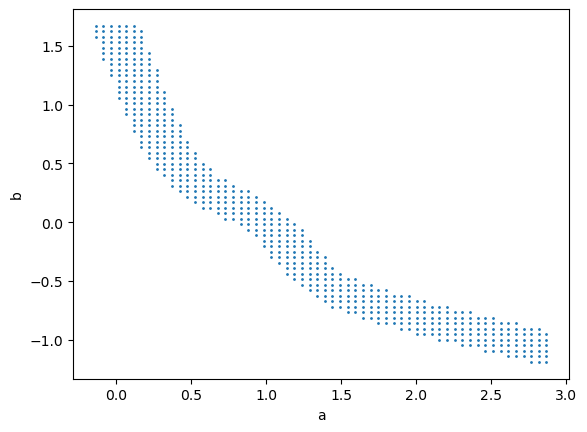

In [26]:
    plt.scatter(df["a"], df["b"], s=1)
    plt.ylabel('b')
    plt.xlabel('a')
    plt.show()

In [27]:
if False: # clreate regression model 
    from sklearn.gaussian_process import GaussianProcessRegressor
    from sklearn.gaussian_process.kernels import RBF
    
    X = np.array(df[["a", "b"]])
    Y = np.array(df["LogIpOverIu"])
    #Y = Y.reshape(-1, 1)
    
    
    
    kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(0.02, 0.25))
    gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
    gaussian_process.fit(X, Y)
    print(gaussian_process.kernel_)
    print(np.sum(np.abs(Y - gaussian_process.predict(X))))

In [28]:
#fileObj = open('GaussianForPoland.pkl', 'wb')
#pickle.dump(gaussian_process,fileObj)
#fileObj.close()

In [29]:
zeta = initialize_cities_array()
LogCitySize = np.log(zeta[:,0])


<BarContainer object of 4 artists>

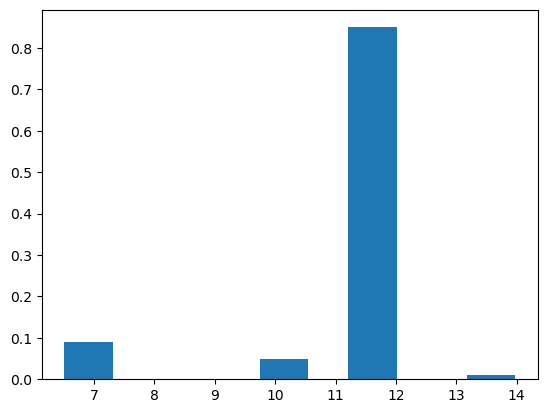

In [30]:
plt.bar(LogCitySize, zeta[:,1])

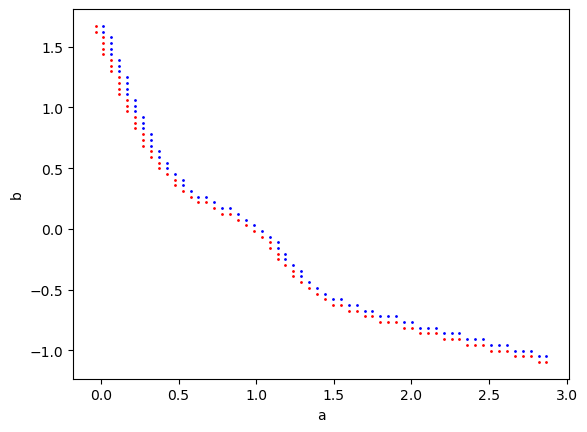

In [31]:
    plt.scatter(DF_boundary["a"][Signs_boundary > 0], DF_boundary["b"][Signs_boundary > 0], c = "red", s=1)
    plt.scatter(DF_boundary["a"][Signs_boundary < 0], DF_boundary["b"][Signs_boundary < 0], c = "blue", s=1)
    plt.ylabel('b')
    plt.xlabel('a')
    plt.show()

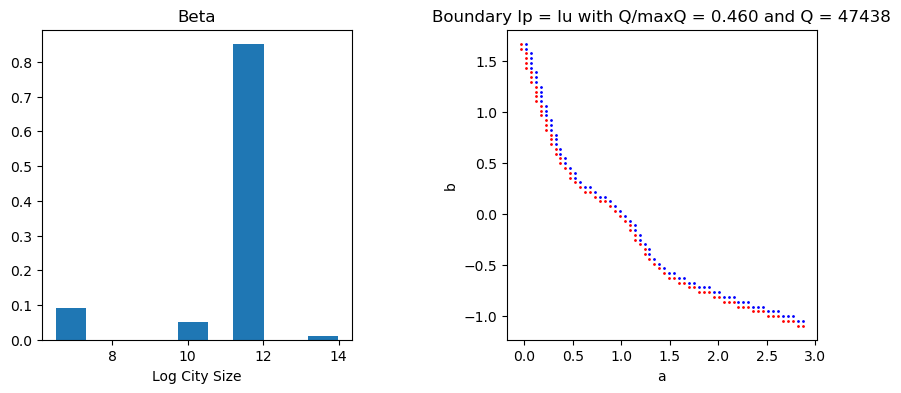

In [32]:


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 21))
ax1.set_box_aspect(1)
ax2.set_box_aspect(1)

plt.subplots_adjust(wspace=0.5)

ax1.bar(LogCitySize, zeta[:,1])
ax2.scatter(DF_boundary["a"][Signs_boundary > 0], DF_boundary["b"][Signs_boundary > 0], c = "red", s=1)
ax2.scatter(DF_boundary["a"][Signs_boundary < 0], DF_boundary["b"][Signs_boundary < 0], c = "blue", s=1)
ax1.set(title= "Beta", xlabel="Log City Size")
ax2.set(title= "Boundary Ip = Iu with Q/maxQ = " + f'{Q_value/maxQ_value():.3f}' + " and Q = " + str(Q_value)
        ,xlabel="a", ylabel="b")

plt.savefig('Boundary' + str(int(time.time()//1)) + '.png', bbox_inches='tight')

plt.show()